**Homework 2**

**Part 1: Regression on California Test Scores**




**1. Find the url for the California Test Score Data Set from the following website:**

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).**


import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import pandas as pd

import numpy as np

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

df.head()

In [152]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pandas as pd
import numpy as np

In [153]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


**1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.**


df ['testscr'].hist()

df['expnstu'].hist()

df['str'].hist()

df['avginc'].hist()



<AxesSubplot:>

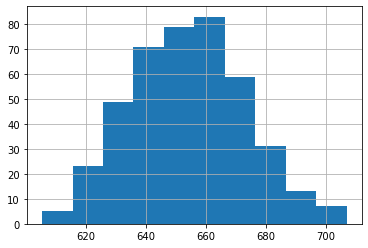

In [154]:
df ['testscr'].hist()

<AxesSubplot:>

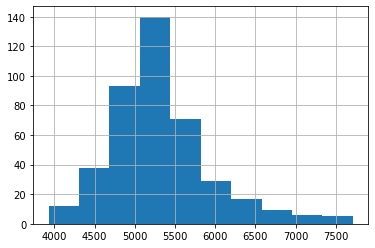

In [155]:
df['expnstu'].hist()

<AxesSubplot:>

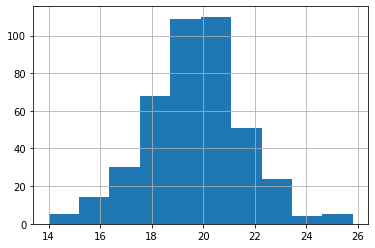

In [156]:
df['str'].hist()

<AxesSubplot:>

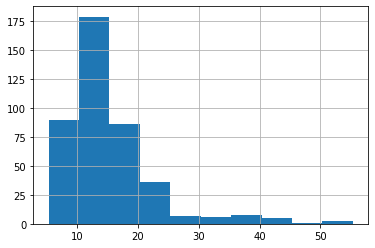

In [157]:
df['avginc'].hist()

**1.2 Visualize the dependency of the target on each feature from 1.1.**

import seaborn as sns

x = sns.regplot(x="testscr" , y="expnstu", data=df, color = 'y')

x = sns.regplot(x="testscr", y="str", data=df, color='r')

x = sns.regplot(x="testscr", y="avginc", data=df)



In [158]:
import seaborn as sns

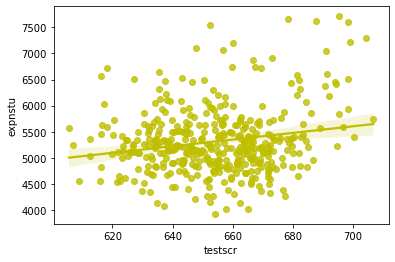

In [159]:
x = sns.regplot(x="testscr" , y="expnstu", data=df, color = 'y')

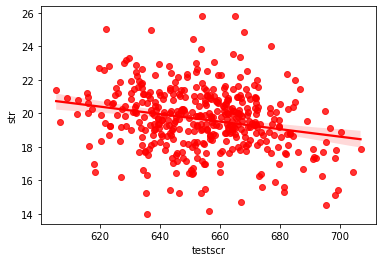

In [160]:
x = sns.regplot(x="testscr", y="str", data=df, color='r')

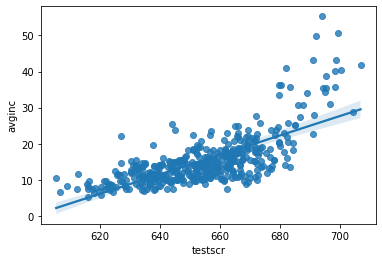

In [161]:
x = sns.regplot(x="testscr", y="avginc", data=df)

**1.3 Split data in training and test set.**

from sklearn.model_selection import train_test_split

split_data = df.drop(df.columns[[16,17]], axis=1)

data = split_data.iloc[:, 5:]

y = data['testscr']

X = data.loc[:, data.columns != 'testscr']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X.head()

In [162]:
from sklearn.model_selection import train_test_split

split_data = df.drop(df.columns[[16,17]], axis=1)

data = split_data.iloc[:, 5:]

y = data['testscr']

X = data.loc[:, data.columns != 'testscr']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


**Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable.**

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold

import numpy as np

kfold = KFold(n_splits=5)

skfold = StratifiedKFold(n_splits=5, shuffle=True)

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

**Evaluate KNN for regression using cross-validation with the default parameters**

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=14)

knn.fit(X_train, y_train)

print("KNN for REGRESSION (UNSCALED DATA)")

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

knn_unscaled = np.mean(cross_val_score(knn, X_train, y_train, scoring='r2', cv=kfold))

In [164]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=14)

knn.fit(X_train, y_train)

print("KNN for REGRESSION (UNSCALED DATA)")

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

knn_unscaled = np.mean(cross_val_score(knn, X_train, y_train, scoring='r2', cv=kfold))

KNN for REGRESSION (UNSCALED DATA)
Training set score: 0.16
Test set score: 0.03
Mean Cross-Validation, kfold: 0.03


**Evaluate Linear Regression (OLS) with the default parameters.**

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#cross validation

from sklearn.model_selection import cross_val_score

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(lr, x_train, y_train, cv=kfold))))

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [166]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#cross validation
from sklearn.model_selection import cross_val_score

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(lr, X_train, y_train, cv=kfold))))

Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, kfold: 0.78


**Evaluate Ridge using cross-validation with the default parameters.**

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold))))

ridge_unscaled = np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold)) 

In [167]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold))))
ridge_unscaled = np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold)) 

Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Evaluate Lasso using cross-validation with the default parameters.**

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))

print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train, y_train, cv=kfold))))

In [168]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train, y_train, cv=kfold))))

Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Does scaling the data with the StandardScaler help?**

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsRegressor

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=14)

knn.fit(X_train_scaled, y_train)

print("KNN for REGRESSION (UNSCALED DATA)")

print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))))

knn_scaled = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))

In [169]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Scaled KNN**

In [170]:
knn = KNeighborsRegressor(n_neighbors=14)

knn.fit(X_train_scaled, y_train)

print("KNN for REGRESSION (UNSCALED DATA)")

print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))))

knn_scaled = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))

KNN for REGRESSION (UNSCALED DATA)
Training set score: 0.77
Test set score: 0.76
Mean Cross-Validation, kfold: 0.72


As you can see from the tables above, the Mean Cross-Validation, kfold, increases from 0.03 to 0.72. Yes, scaling the data with the StandardScaler helps.

**Scaled OLS**

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

#cross validation

from sklearn.model_selection import cross_val_score

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(lr, x_train_scaled, y_train, cv=kfold))))

In [171]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

#cross validation
from sklearn.model_selection import cross_val_score

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=kfold))))

Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, kfold: 0.78


As you can see from the tables above, the Mean Cross-Validation, kfold, remains 0.78. No, scaling the data with the StandardScaler does not help.

**Scaled Ridge**

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold))))

In [174]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold))))

Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, kfold: 0.78


As you can see from the tables above, the Mean Cross-Validation, kfold, remains 0.78. No, scaling the data with the StandardScaler does not help. No, scaling the data with the StandardScaler does not help.

**Scaled Lasso**

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))

print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=kfold))))

In [175]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("Mean Cross-Validation, kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=kfold))))

Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, kfold: 0.78


As you can see from the tables above, the Mean Cross-Validation, kfold, remains 0.78. No, scaling the data with the StandardScaler does not help.

**1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?**

**GridSearchCV with knn**

from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

knn_param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("KNN for Regression (Scaled Data)")

print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(knn_grid.best_params_))

In [186]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [187]:
knn_param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold).fit(X_train_scaled, y_train)
print("KNN for Regression (Scaled Data)")
print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid.best_params_))

KNN for Regression (Scaled Data)
Test set Score: 0.78
Best Parameter: {'kneighborsregressor__n_neighbors': 6}


As you can see from the tables above, yes, the results improve.

**GridSearchCV with OLS**

Not available

**GridSearchCV with Ridge**

from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsRegressor

ridge_pipe = make_pipeline(StandardScaler(), Ridge())

ridge_param_grid = {'ridge__alpha': np.linspace(0.1, 100.1, 1)}

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print(ridge_grid.best_params_)

print(ridge_grid.score(X_test_scaled, y_test))

In [188]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

ridge_pipe = make_pipeline(StandardScaler(), Ridge())

ridge_param_grid = {'ridge__alpha': np.linspace(0.1, 100.1, 1)}

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=kfold).fit(X_train_scaled, y_train)

In [189]:
print(ridge_grid.best_params_)
print(ridge_grid.score(X_test_scaled, y_test))

{'ridge__alpha': 0.1}
0.8070461725654837


As you can see from the tables above, no, the results do not improve.

**GridSearchCV with LASSO**

from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsRegressor

lasso_pipe = make_pipeline(StandardScaler(), Lasso())

lasso_param_grid = {'lasso__alpha': np.linspace(0.1, 100.1, 1)}

lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print(lasso_grid.best_params_)

print(lasso_grid.score(X_test_scaled, y_test))

In [103]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

lasso_pipe = make_pipeline(StandardScaler(), Lasso())

lasso_param_grid = {'lasso__alpha': np.linspace(0.1, 100.1, 1)}

lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=kfold).fit(X_train_scaled, y_train)

In [104]:
print(lasso_grid.best_params_)
print(lasso_grid.score(X_test_scaled, y_test))

{'lasso__alpha': 0.1}
0.8054789700502258


As you can see from the tables above, no, the results do not improve.

**1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?**

Since GridSearchCV with OLS is not available for comparison, my two best linear models are Ridge and LASSO.

import pandas as pd

import numpy as np

lasso = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

ridge = Ridge(alpha=10).fit(X_train_scaled, y_train)

d = {'LASSO': lasso.coef_, 'Ridge': ridge.coef_}

results = pd.DataFrame(d, X.columns)

results

In [105]:
import pandas as pd

import numpy as np

lasso = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

ridge = Ridge(alpha=10).fit(X_train_scaled, y_train)

d = {'LASSO': lasso.coef_, 'Ridge': ridge.coef_}

results = pd.DataFrame(d, X.columns)

results

,LASSO,Ridge
enrltot,-0.000000,-0.296762
teachers,-0.000000,-0.347868
calwpct,-1.015310,-1.647477
mealpct,-9.931920,-8.810726
computer,0.000000,0.755095
compstu,0.019521,-0.037605
expnstu,1.074776,1.117175
str,-0.580477,-0.634427
avginc,3.697999,3.911891
elpct,-3.349810,-3.806197


Yes, they agree on important features such as **avginc** and **expnstu**.

print("Number of features used with LASSO: {}".format(np.sum(lasso.coef_ !=0)))

print("Number of features used with Ridge: {}".format(np.sum(ridge.coef_ !=0)))

In [106]:
print("Number of features used with LASSO: {}".format(np.sum(lasso.coef_ !=0)))
print("Number of features used with Ridge: {}".format(np.sum(ridge.coef_ !=0)))

Number of features used with LASSO: 7
Number of features used with Ridge: 10


**1.6 Discuss which final model you would choose to predict new data**

As you can see from the comparision above, I would choose LASSO for the disparaties between the coefficients are smaller and its accuracy is higher.

**Part 2: Classification on red and white wine characteristics**

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')


r = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

r.head()

In [193]:
r = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [194]:
r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


w = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

w.head()

In [195]:
w = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [196]:
w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".


red = r.assign(winetype=1)

red.head()

In [197]:
red = r.assign(winetype=1)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


white = w.assign(winetype=0)

white.head()

In [198]:
white = w.assign(winetype=0)
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


mix = [white, red]

wines = pd.concat(mix)

wines.head()

In [199]:
mix = [white, red]

In [200]:
wines = pd.concat(mix)

In [201]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


**2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.**

import matplotlib.pyplot as plt

sns.boxplot(x='winetype', y='fixed acidity', data=wines)

sns.boxplot(x='winetype', y='citric acid', data=wines)

sns.boxplot(x='winetype', y='total sulfur dioxide', data=wines)

In [202]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='winetype', ylabel='fixed acidity'>

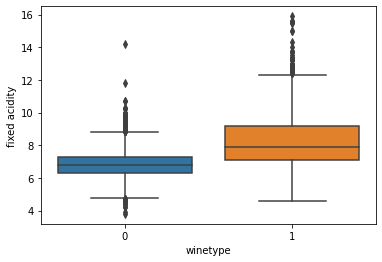

In [203]:
sns.boxplot(x='winetype', y='fixed acidity', data=wines)

<AxesSubplot:xlabel='winetype', ylabel='citric acid'>

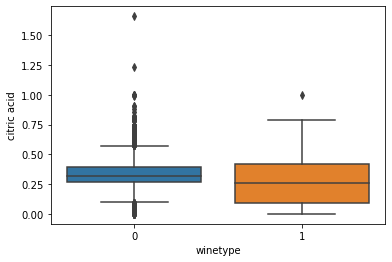

In [204]:
sns.boxplot(x='winetype', y='citric acid', data=wines)

<AxesSubplot:xlabel='winetype', ylabel='total sulfur dioxide'>

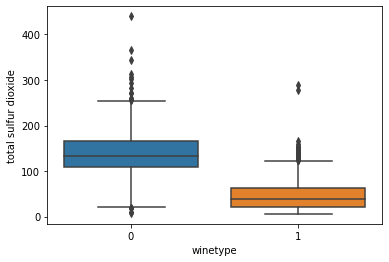

In [205]:
sns.boxplot(x='winetype', y='total sulfur dioxide', data=wines)

**2.2 Split data into training and test set.**

from sklearn.model_selection import train_test_split

wines = pd.concat(mix)

y = wines['winetype']

X = wines.loc[:, wines.columns != 'winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X.head()

In [206]:
from sklearn.model_selection import train_test_split
wines = pd.concat(mix)
y = wines['winetype']
X = wines.loc[:, wines.columns != 'winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Build models that evaluate the relationship between all available X variables in the dataset and the target variable.**

**Evaluate Logistic Regression**

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))

print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) 

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))

logreg_predicted_vals = logreg.predict(X_test)

logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Logistic Regression Coefficients'])

logreg_coef.head()

In [223]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [224]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) 

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))

logreg_predicted_vals = logreg.predict(X_test)

logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Logistic Regression Coefficients'])
logreg_coef.head()

/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.98
Test set score: 0.97
Mean Cross Validation, KFold: 0.98


/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.79298,-0.083268


**Penalized Logistic Regression**

pen_logreg = LogisticRegression(penalty = 'l2').fit(X_train, y_train)

print("PENALIZED LOGISTIC REGRESSION (UNSCALED DATA)")

print("Training set score: {:.2f}".format(pen_logreg.score(X_train, y_train)))

print("Test set score: {:.2f}".format(pen_logreg.score(X_test, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg, X_train, y_train, cv=kfold))))

pen_logreg_predicted_vals = pen_logreg.predict(X_test)

pen_logreg_coef = pd.DataFrame(data=pen_logreg.coef_, columns=X.columns, index=['Penalized Logistic Regression Coefficients'])

c = [logreg_coef, pen_logreg_coef]

coefs = pd.concat(c)

coefs.head()

In [222]:
pen_logreg = LogisticRegression(penalty = 'l2').fit(X_train, y_train)

print("PENALIZED LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.2f}".format(pen_logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pen_logreg.score(X_test, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg, X_train, y_train, cv=kfold))))

pen_logreg_predicted_vals = pen_logreg.predict(X_test)

pen_logreg_coef = pd.DataFrame(data=pen_logreg.coef_, columns=X.columns, index=['Penalized Logistic Regression Coefficients'])

c = [logreg_coef, pen_logreg_coef]
coefs = pd.concat(c)
coefs.head()

/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

PENALIZED LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.98
Test set score: 0.97
Mean Cross Validation, KFold: 0.98


/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.79298,-0.083268
Penalized Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.79298,-0.083268


**KNN for classification using cross-validation**

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER (UNSCALED DATA)")

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

y_pred = knn.predict(X_test)

In [210]:
from sklearn.neighbors import KNeighborsClassifier
# Notice that I'm using a Classifier here (as opposed to the Regressor we used in PART 1)

knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER (UNSCALED DATA)")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

# Wine type prediction from test set (I'll use this later)
y_pred = knn.predict(X_test)

KNN CLASSIFER (UNSCALED DATA)
Training set score: 0.96
Test set score: 0.94
Mean Cross Validation, KFold: 0.94


**How different are the results?**

results = pd.DataFrame()

results = results.assign(L2=logreg_predicted_vals)

results = results.assign(L1=pen_logreg_predicted_vals)

results = results.assign(knn=y_pred)

print("COMBINATIONS OF PREDICTIONS: LOG REG by PEN LOG REG by KNN")

results.groupby(['L2','L1'])['knn'].count()

results.groupby(['L2','knn'])['L1'].count()

results.groupby(['knn','L1'])['L2'].count()

In [211]:
results = pd.DataFrame()
results = results.assign(L2=logreg_predicted_vals)
results = results.assign(L1=pen_logreg_predicted_vals)
results = results.assign(knn=y_pred)

print("COMBINATIONS OF PREDICTIONS: LOG REG by PEN LOG REG by KNN")
results.groupby(['L2','L1'])['knn'].count()

COMBINATIONS OF PREDICTIONS: LOG REG by PEN LOG REG by KNN


L2  L1
0   0     1250
1   1      375
Name: knn, dtype: int64

In [212]:
results.groupby(['L2','knn'])['L1'].count()

L2  knn
0   0      1214
    1        36
1   0        55
    1       320
Name: L1, dtype: int64

In [213]:
results.groupby(['knn','L1'])['L2'].count()

knn  L1
0    0     1214
     1       55
1    0       36
     1      320
Name: L2, dtype: int64

**How does scaling the data with StandardScaler influence the results?**

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [214]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Scaled logistic regression**

logreg_scaled = LogisticRegression().fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")

print("Training set score: {:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg_scaled, X_train_scaled, y_train, cv=kfold))))

logreg_scaled_coef = pd.DataFrame(data=logreg_scaled.coef_, columns=X.columns, index=['Scaled Logistic Regression Coefficients'])

c2 = [logreg_coef, pen_logreg_coef, logreg_scaled_coef]

coefs = pd.concat(c2)

coefs.head()

In [215]:
logreg_scaled = LogisticRegression().fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg_scaled, X_train_scaled, y_train, cv=kfold))))

logreg_scaled_coef = pd.DataFrame(data=logreg_scaled.coef_, columns=X.columns, index=['Scaled Logistic Regression Coefficients'])

c2 = [logreg_coef, pen_logreg_coef, logreg_scaled_coef]
coefs = pd.concat(c2)
coefs.head()

LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.99
Test set score: 0.99
Mean Cross Validation, KFold: 0.99


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.792980,-0.083268
Penalized Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.792980,-0.083268
Scaled Logistic Regression Coefficients,0.355438,1.280869,-0.359597,-3.521214,0.793006,0.928958,-2.918439,3.497433,0.320909,0.635613,1.204437,0.162930


**scaled penolized regression**

pen_logreg_scaled = LogisticRegression(penalty = 'l2').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")

print("Training set score: {:.2f}".format(pen_logreg_scaled.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(pen_logreg_scaled.score(X_test_scaled, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg_scaled, X_train, y_train, cv=kfold))))

pen_logreg_scaled_coef = pd.DataFrame(data=pen_logreg_scaled.coef_, columns=X.columns, index=['Scaled Penalized Logistic Regression Coefficients'])

c3 = [logreg_coef, pen_logreg_coef, logreg_scaled_coef, pen_logreg_scaled_coef]

coefs = pd.concat(c3)

coefs.head()

In [216]:
pen_logreg_scaled = LogisticRegression(penalty = 'l2').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(pen_logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(pen_logreg_scaled.score(X_test_scaled, y_test)))
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg_scaled, X_train, y_train, cv=kfold))))

pen_logreg_scaled_coef = pd.DataFrame(data=pen_logreg_scaled.coef_, columns=X.columns, index=['Scaled Penalized Logistic Regression Coefficients'])

c3 = [logreg_coef, pen_logreg_coef, logreg_scaled_coef, pen_logreg_scaled_coef]
coefs = pd.concat(c3)
coefs.head()

PENALIZED LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.99
Test set score: 0.99
Mean Cross Validation, KFold: 0.98


/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hujiayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.792980,-0.083268
Penalized Logistic Regression Coefficients,0.682544,8.414581,-1.859663,-0.159831,1.280977,0.055272,-0.065317,-1.415481,1.354532,6.600871,-0.792980,-0.083268
Scaled Logistic Regression Coefficients,0.355438,1.280869,-0.359597,-3.521214,0.793006,0.928958,-2.918439,3.497433,0.320909,0.635613,1.204437,0.162930
Scaled Penalized Logistic Regression Coefficients,0.355438,1.280869,-0.359597,-3.521214,0.793006,0.928958,-2.918439,3.497433,0.320909,0.635613,1.204437,0.162930


**Scaled KNN**

knn_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")

print("Training set score: {:.2f}".format(knn_scaled.score(X_train_scaled, y_train)))

print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train, cv=kfold))))

In [217]:
knn_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("Training set score: {:.2f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train, cv=kfold))))

KNN CLASSIFER (SCALED DATA)
Training set score: 0.98
Test set score: 0.96
Mean Cross Validation, KFold: 0.97


**Do the results improve?**

Yes, all the results improve.

**2.3 Tune the parameters where possible using GridSearchCV.**

**logistic regrssion with GridSearchCV**

logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}

logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(logreg_grid.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(logreg_grid.best_params_))

In [218]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 9.0}


**Penalized logistic regression with GridSearchCV**

pen_logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

pen_logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}

pen_logreg_grid = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(pen_logreg_grid.best_params_))

In [219]:
pen_logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))
pen_logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
pen_logreg_grid = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))

PENLIZED LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 9.0}


**Do the results improve?**

KNN only

**2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?**

**GridsearchCV of Logistic Regression with Repeated KFold (rkf)**

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1) 

rkf_1 = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

logreg_grid_rfk = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(logreg_grid_rfk.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(logreg_grid_rfk.best_params_))

In [ ]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
rkf_1 = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

In [ ]:
logreg_grid_rfk = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid_rfk.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid_rfk.best_params_))

**GridsearchCV of Penalized Logistic Regression with Repeated KFold (rkf)**

pen_logreg_grid_rfk = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(pen_logreg_grid_rfk.best_params_))

In [ ]:
pen_logreg_grid_rfk = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid_rfk.best_params_))

**GridsearchCV of KNN Classifier with Repeated KFold (rkf)**

In [ ]:
knn_grid_rfk = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid_rfk.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid_rfk.best_params_))

**Do the parameters for models that can be tuned change?**

Yes, they do.

**GridsearchCV of Logistic Regression with Repeated KFold (rkf) and new random seed**


logreg_grid_rfk_1 = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(logreg_grid_rfk_1.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(logreg_grid_rfk_1.best_params_))

In [ ]:
logreg_grid_rfk_1 = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid_rfk_1.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid_rfk_1.best_params_))

**GridsearchCV of Penalized Logistic Regression with Repeated KFold (rkf) and new random seed**

pen_logreg_grid_rfk_1 = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk_1.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(pen_logreg_grid_rfk_1.best_params_))

In [ ]:
pen_logreg_grid_rfk_1 = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk_1.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid_rfk_1.best_params_))

**GridsearchCV of KNN Classifier with Repeated KFold (rkf) and new random seed**

knn_grid_rfk_1 = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")

print("Test set Score: {:.2f}".format(knn_grid_rfk_1.score(X_test_scaled, y_test)))

print("Best Parameter: {}".format(knn_grid_rfk_1.best_params_))

print("Parameters for LOGISTIC REGRESSION")

print("     KFold w/out Shuffling: {}".format(logreg_grid.best_params_))

print("            Repeated KFold: {}".format(logreg_grid_rfk.best_params_))

print("Repeated KFold w/ new seed: {}".format(logreg_grid_rfk_1.best_params_))
print("")
print("Parameters for PENALIZED LOGISTIC REGRESSION")

print("     KFold w/out Shuffling: {}".format(pen_logreg_grid.best_params_))

print("            Repeated KFold: {}".format(pen_logreg_grid_rfk.best_params_))

print("Repeated KFold w/ new seed: {}".format(pen_logreg_grid_rfk_1.best_params_))

print("")
print("Parameters for KNN CLASSIFIER")

print("     KFold w/out Shuffling: {}".format(knn_grid.best_params_))

print("            Repeated KFold: {}".format(knn_grid_rfk.best_params_))

print("Repeated KFold w/ new seed: {}".format(knn_grid_rfk_1.best_params_))

In [ ]:
knn_grid_rfk_1 = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid_rfk_1.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid_rfk_1.best_params_))

In [ ]:
print("Parameters for LOGISTIC REGRESSION")
print("     KFold w/out Shuffling: {}".format(logreg_grid.best_params_))
print("            Repeated KFold: {}".format(logreg_grid_rfk.best_params_))
print("Repeated KFold w/ new seed: {}".format(logreg_grid_rfk_1.best_params_))
print("")
print("Parameters for PENALIZED LOGISTIC REGRESSION")
print("     KFold w/out Shuffling: {}".format(pen_logreg_grid.best_params_))
print("            Repeated KFold: {}".format(pen_logreg_grid_rfk.best_params_))
print("Repeated KFold w/ new seed: {}".format(pen_logreg_grid_rfk_1.best_params_))
print("")
print("Parameters for KNN CLASSIFIER")
print("     KFold w/out Shuffling: {}".format(knn_grid.best_params_))
print("            Repeated KFold: {}".format(knn_grid_rfk.best_params_))
print("Repeated KFold w/ new seed: {}".format(knn_grid_rfk_1.best_params_))

Yes

**2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.**

coefs = pd.concat(c3)

coefs.head()

In [ ]:
coefs = pd.concat(c3)
coefs.head()

As yo ucan see from the tables above, I would choose Penalized Logistic Regression with scaled data.